[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/kyorin-phys/joho/blob/main/p11.ipynb)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

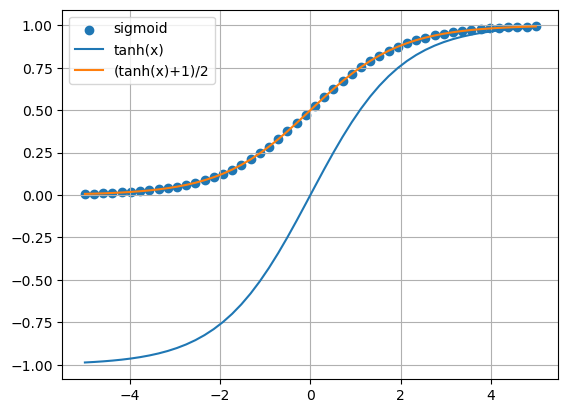

In [2]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.linspace(-5, 5)
y = sigmoid(x)
y2 = np.tanh(x/2)
y3 = (y2+1)/2
plt.scatter(x, y, label='sigmoid')
plt.plot(x, y2, label='tanh(x)')
plt.plot(x, y3, label='(tanh(x)+1)/2')
plt.legend()
plt.grid()

(-3.0, 3.0)

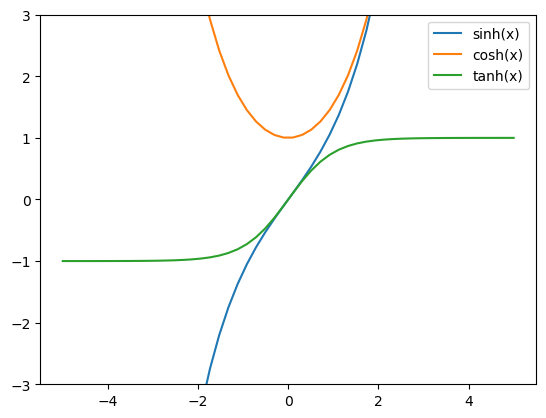

In [3]:
plt.plot(x, np.sinh(x), label='sinh(x)')
plt.plot(x, np.cosh(x), label='cosh(x)')
plt.plot(x, np.tanh(x), label='tanh(x)')
plt.legend()
plt.ylim(-3,3)

In [4]:
def create_matrix(x):
    x0 = np.ones([x.shape[0], 1])
    return np.hstack([x0, x])

x = np.matrix([[0,1],[2,3]])
y = create_matrix(x)
print(x, y)

[[0 1]
 [2 3]] [[1. 0. 1.]
 [1. 2. 3.]]


In [5]:
def sigmoid(X, parameter):
    return 1 / (np.exp(-np.dot(X, parameter)))

def logistic_regression(X, t):
    LNR = 1e-1
    loop = 50
    count = 1
    parameter = np.random.rand(3)
    for i in range(loop):
        parameter = parameter - LNR*np.dot(sigmoid(X, parameter)-t, X)
        if (count == 1 or count % 10 == 0):
            print('{}: parameter = {}'.format(count, parameter))
        count += 1
    return parameter

In [6]:
x = np.array([[0,0], [0,1], [1,0], [1,1]])
t = np.array([0,0,0,1])
X = create_matrix(x)
parameter = logistic_regression(X, t)

1: parameter = [-0.55042231 -0.387903   -0.48540963]
10: parameter = [-0.96392296 -0.06477311 -0.13509879]
20: parameter = [-1.32023021  0.23211308  0.18226063]
30: parameter = [-1.6305353   0.46637524  0.43032584]
40: parameter = [-1.90431214  0.65732665  0.63063854]
50: parameter = [-2.14749968  0.81811661  0.79789577]


In [7]:
(sigmoid(create_matrix(np.array([[0,0],[0,1],[1,0],[1,1]])),parameter)>=0.5).astype(np.uint)

array([0, 0, 0, 1], dtype=uint32)